# **Big Mart Sales Prediction**

In [1]:
#Importing Libraries

import pandas as pd                # For data manipulation
import numpy as np                 # For matrix multiplication
import scipy                       # For stats and metrics
import math                        # For maths
import matplotlib.pyplot as plt    # For data visualisation
import seaborn as sns              # For advanced data visualisation
import warnings                    # For ignoring warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
        
print("Basic Libraries are Ready to use .....")
########################################################################
    
import sklearn
from sklearn.model_selection import train_test_split                         # Train Test Split for Evaluating Different Models
from sklearn.preprocessing import StandardScaler                             # For Scaling the Data
        
print("Preprocessing Libraries are Ready to use .....")
#########################################################################
        
from RegressionModels import RegressionModels as models
        
print("Machine Learning Algorithms are Ready to use .....")
#########################################################################
    
from sklearn.metrics import mean_squared_error, mean_absolute_error


print("Metric Libraries are Ready to use .....")
#########################################################################

Basic Libraries are Ready to use .....
Preprocessing Libraries are Ready to use .....
Machine Learning Algorithms are Ready to use .....
Metric Libraries are Ready to use .....


In [2]:
# Importing Dataset

train = pd.read_csv('Big_Mart_Sales_Prediction_Train.csv')
print(train.shape)

(8523, 12)


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060,NaN,NaN,NaN,12.8576,4.64346,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523,NaN,NaN,NaN,0.066132,0.0515978,0,0.0269895,0.0539309,0.0945853,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Item_Visibility has minimum value as 0, but in real world it can't be possible.

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
cat_var = train.select_dtypes('object').columns
cat_var = cat_var.drop('Item_Identifier')

for i in cat_var:
  print("****************************************")
  print(f"{i}")
  print(train[i].value_counts())

****************************************
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
****************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
****************************************
Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
***************************

* In Item_Fat_Content there are some typos are there like **LF in place of Low Fat and reg in place of Regular**.

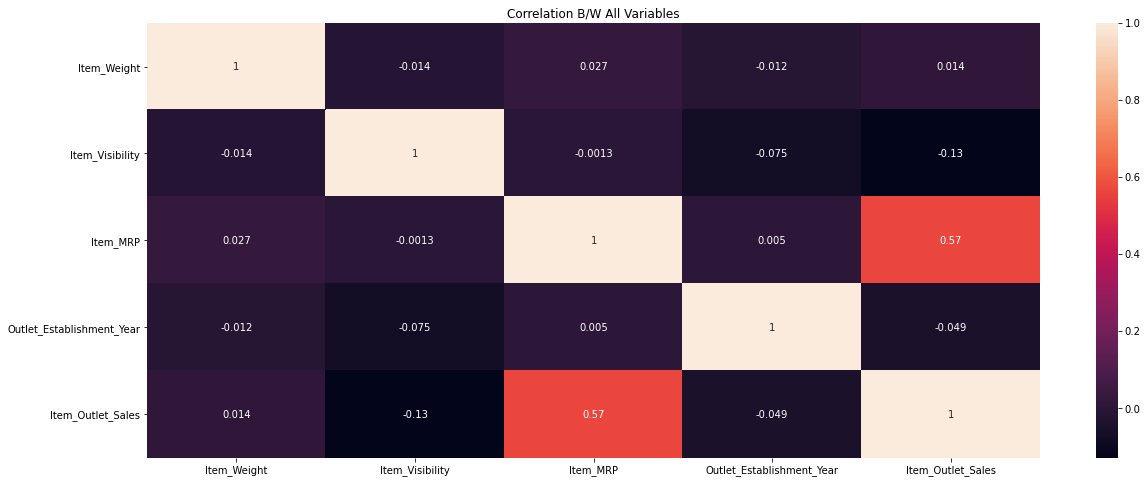

In [7]:
# Correlation between all variables

plt.figure(figsize = (20, 8))
sns.heatmap(train.corr(), annot = True)
plt.title("Correlation B/W All Variables")
plt.show()

* **Item_MRP** has a very **strong correlation** with Item_Outlet_Sales.

## ***Single Variable Data Analysis***

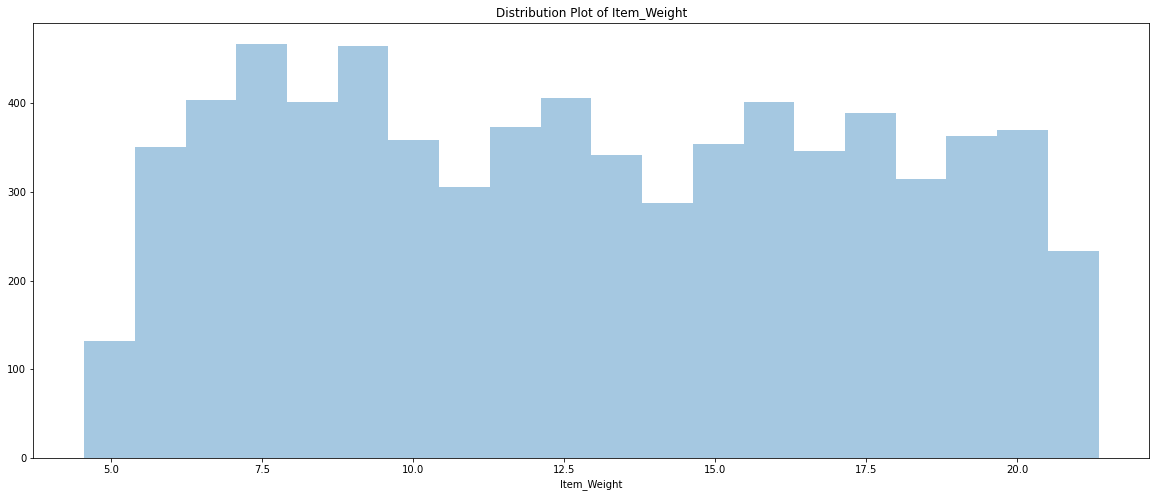

In [8]:
plt.figure(figsize = (20, 8))
sns.distplot(train['Item_Weight'], kde = False)
plt.title("Distribution Plot of Item_Weight")
plt.show()

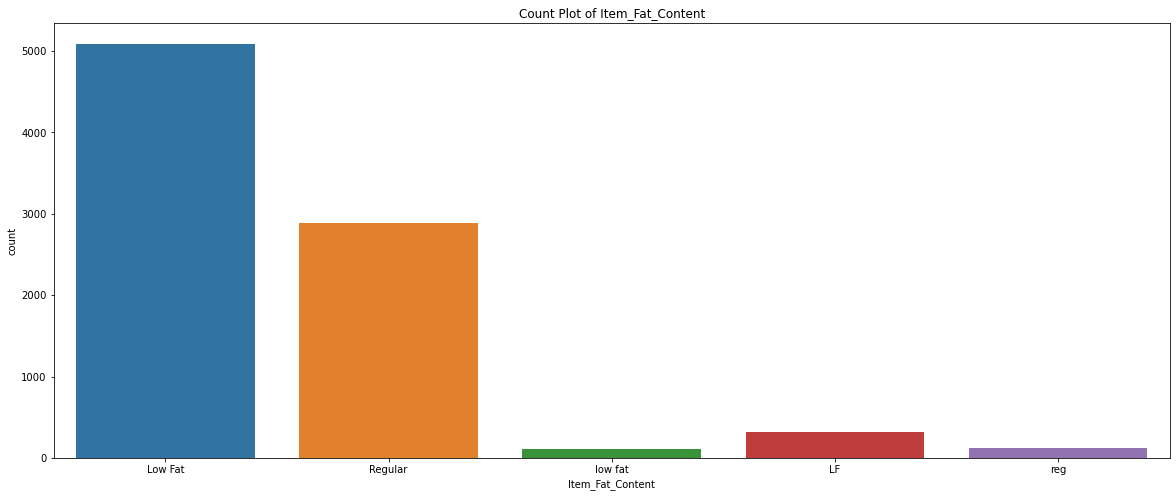

In [9]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Item_Fat_Content', data = train)
plt.title("Count Plot of Item_Fat_Content")
plt.show()

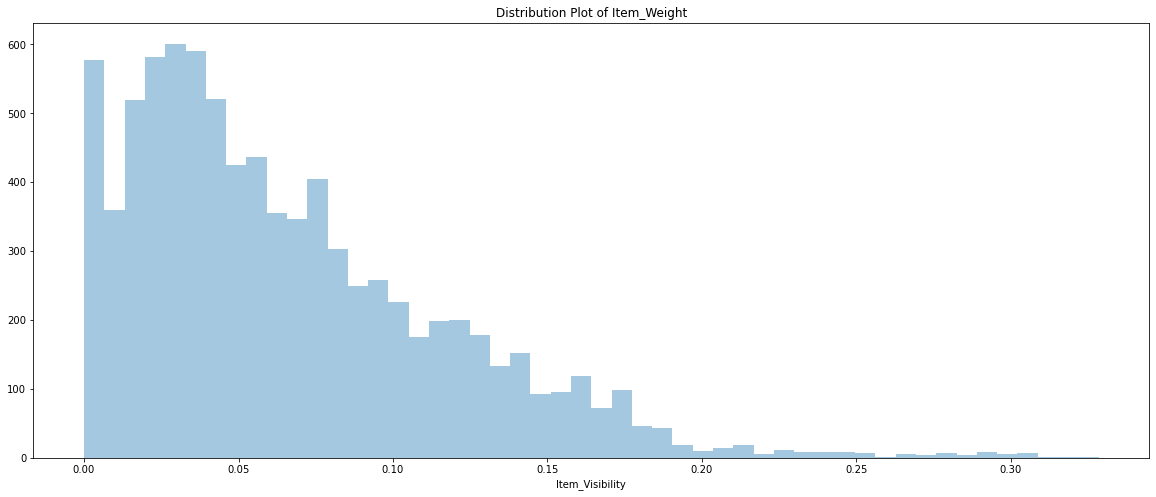

In [10]:
plt.figure(figsize = (20, 8))
sns.distplot(train['Item_Visibility'], kde = False)
plt.title("Distribution Plot of Item_Weight")
plt.show()

* Item_Visibility is a **skewed distribution** and having some **errors like "0" value**.

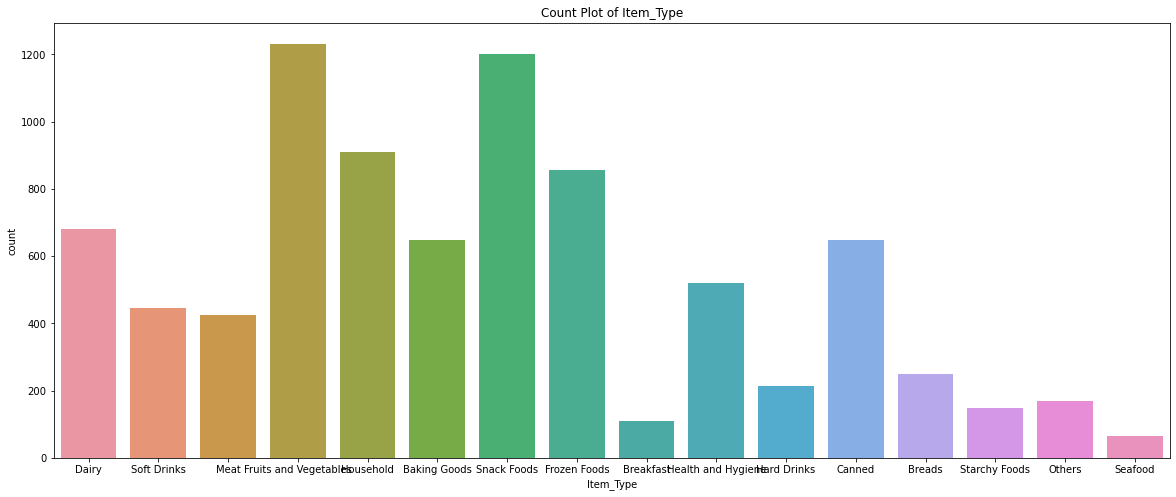

In [11]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Item_Type', data = train)
plt.title("Count Plot of Item_Type")
plt.show()

* **Fruits and Vegetables, Snack Foods** leading the Item_Outlet_Sales followed by Frozen Foods and House Holds.

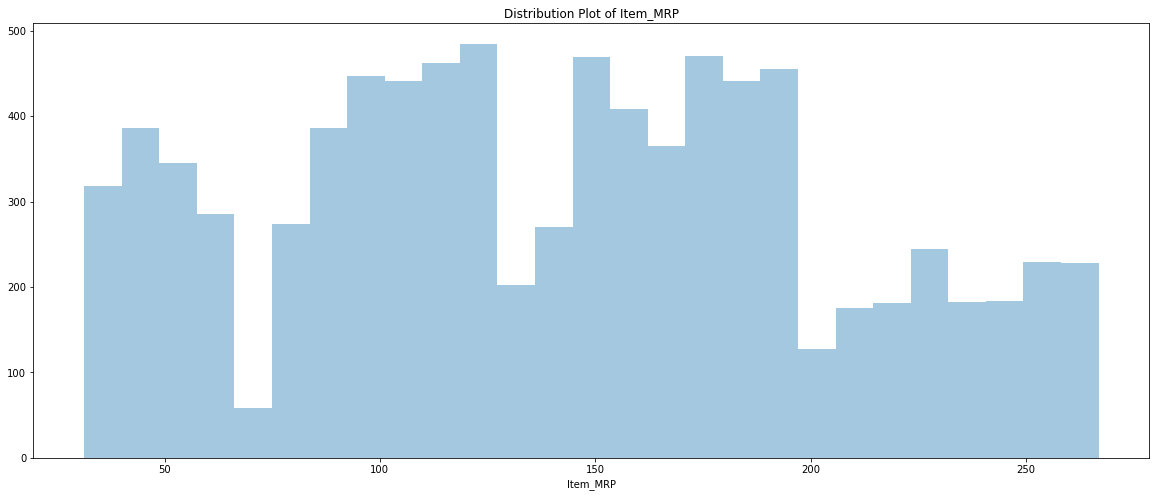

In [12]:
plt.figure(figsize = (20, 8))
sns.distplot(train['Item_MRP'], kde = False)
plt.title("Distribution Plot of Item_MRP")
plt.show()

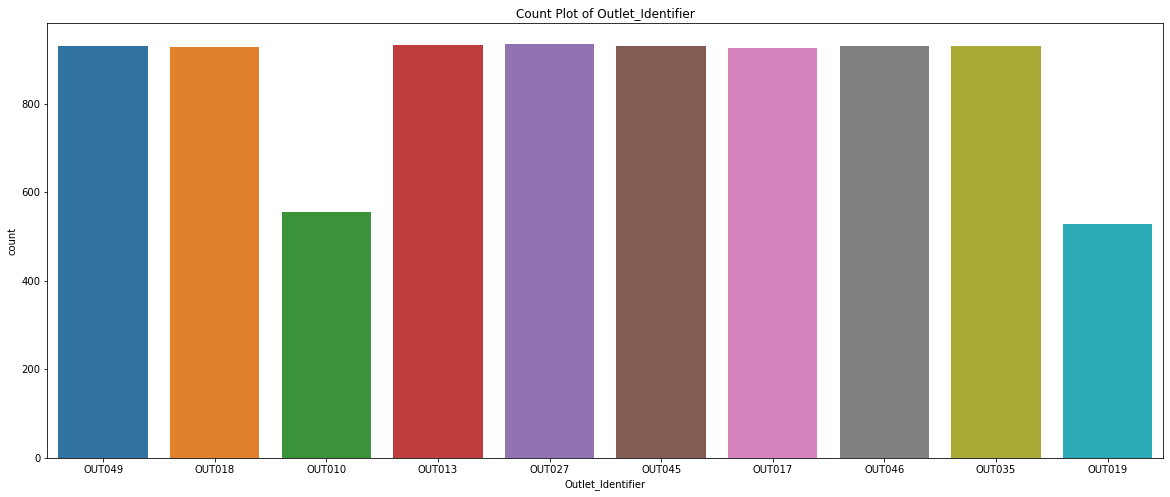

In [13]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Outlet_Identifier', data = train)
plt.title("Count Plot of Outlet_Identifier")
plt.show()

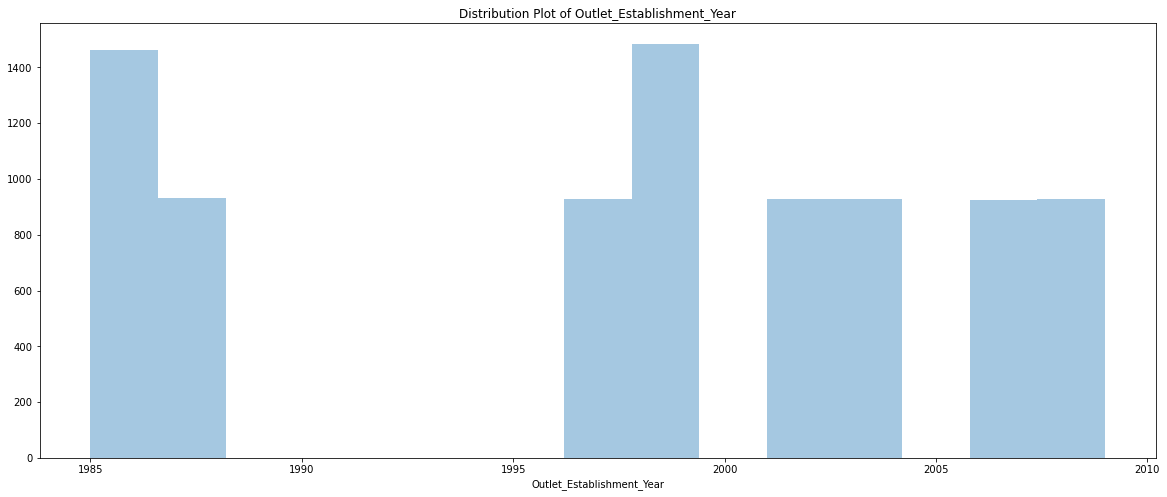

In [14]:
plt.figure(figsize = (20, 8))
sns.distplot(train['Outlet_Establishment_Year'], kde = False)
plt.title("Distribution Plot of Outlet_Establishment_Year")
plt.show()

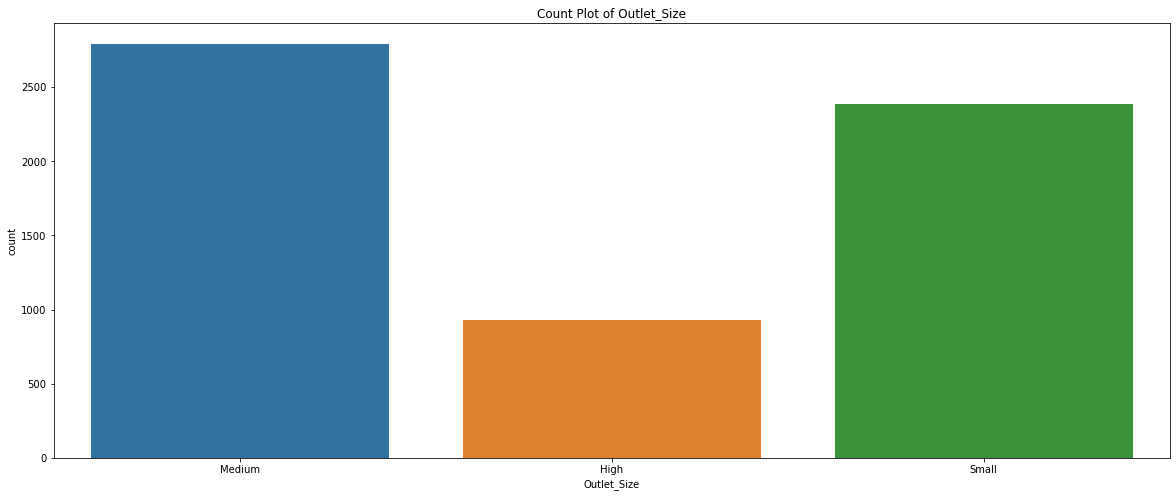

In [15]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Outlet_Size', data = train)
plt.title("Count Plot of Outlet_Size")
plt.show()

* Very less Outlets are there with Outlet_Size **'High'**.

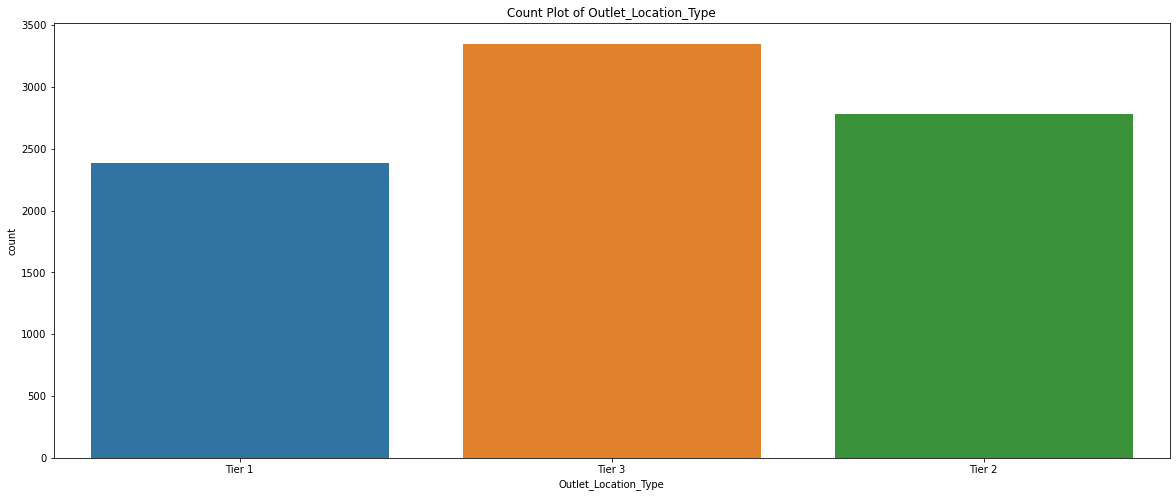

In [16]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Outlet_Location_Type', data = train)
plt.title("Count Plot of Outlet_Location_Type")
plt.show()

* In **Tier3** more outlets are there as compared to other tier's.

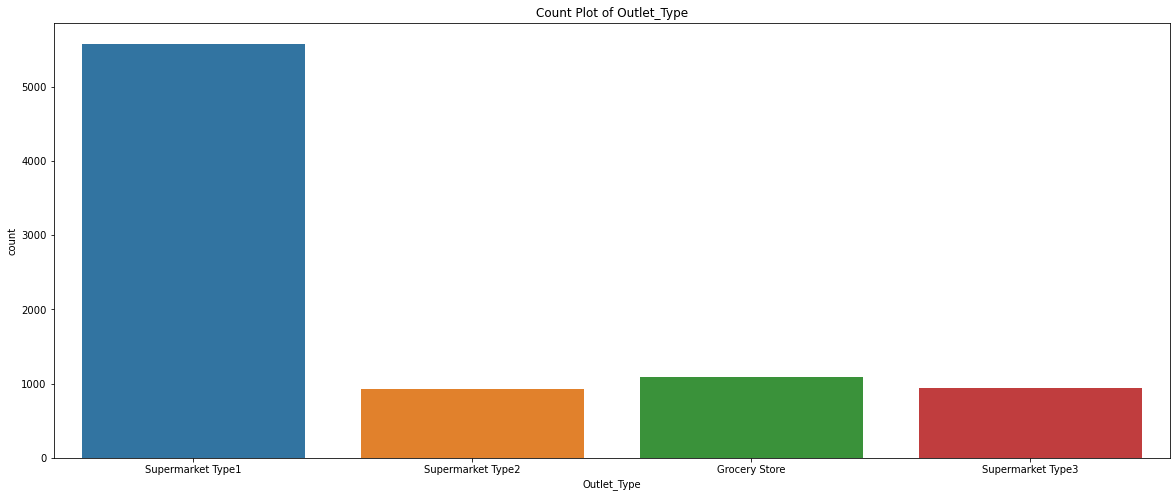

In [17]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Outlet_Type', data = train)
plt.title("Count Plot of Outlet_Type")
plt.show()

* Most Outlets are **Supermarket Type1** type.

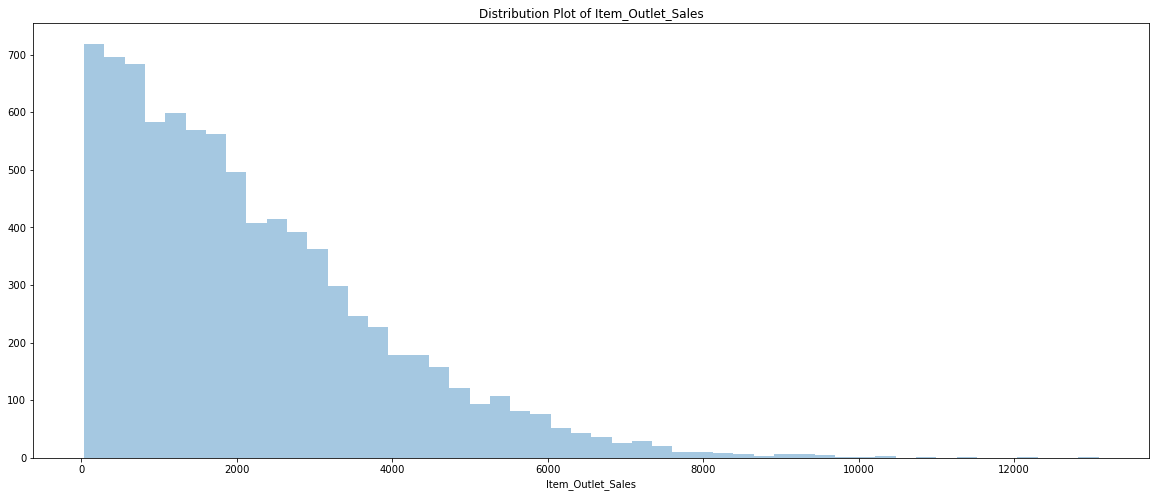

In [18]:
plt.figure(figsize = (20, 8))
sns.distplot(train['Item_Outlet_Sales'], kde = False)
plt.title("Distribution Plot of Item_Outlet_Sales")
plt.show()

## ***Multi Variable Data Analysis***

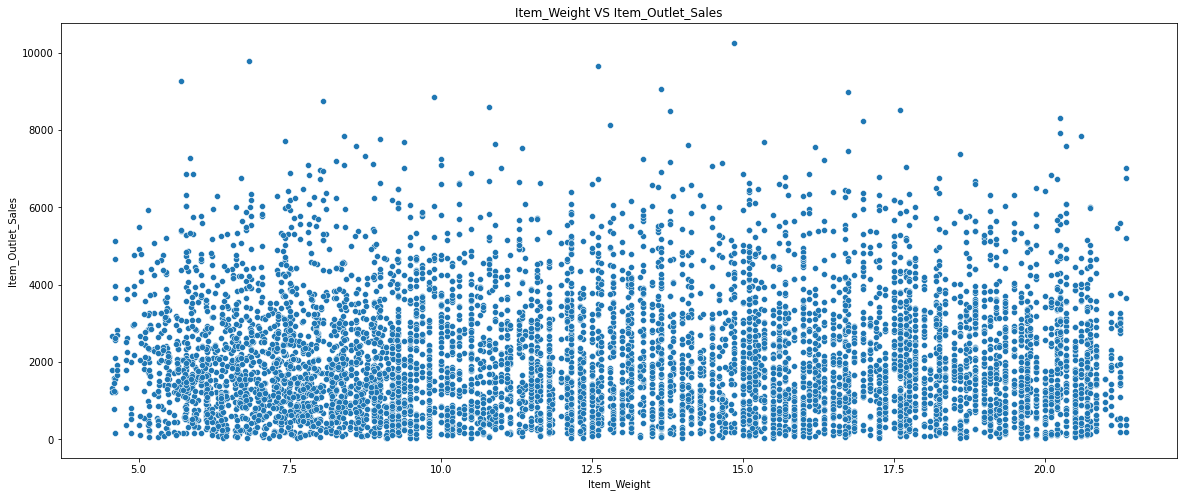

In [19]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = train)
plt.title("Item_Weight VS Item_Outlet_Sales")
plt.show()

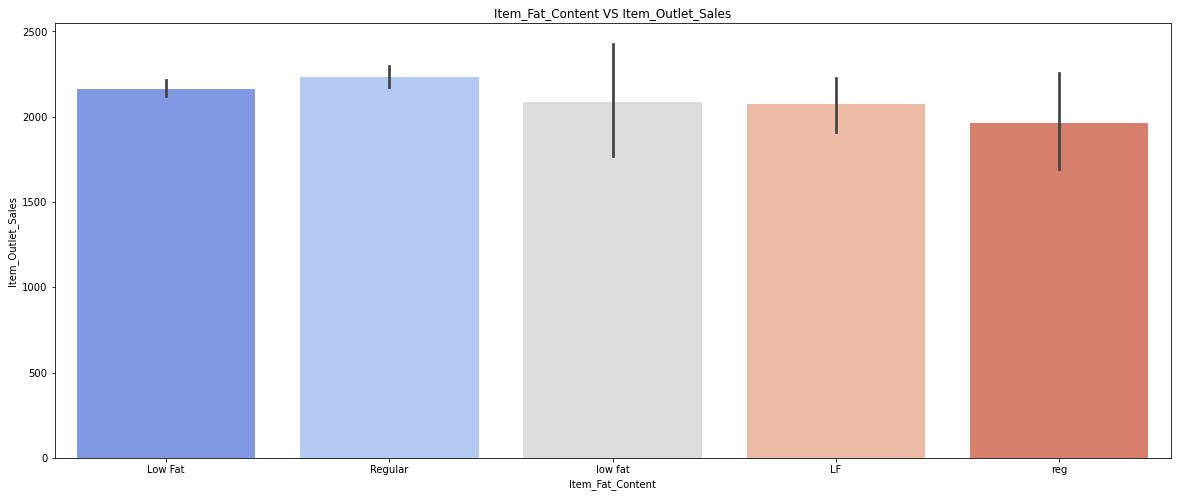

In [20]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Item_Fat_Content', data = train, palette = 'coolwarm')
plt.title("Item_Fat_Content VS Item_Outlet_Sales")
plt.show()

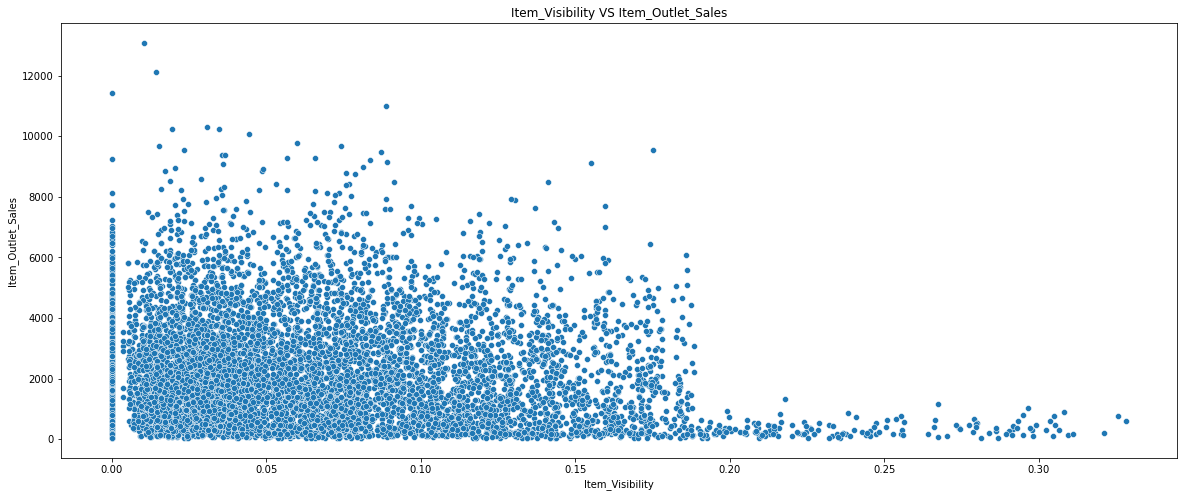

In [21]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = train)
plt.title("Item_Visibility VS Item_Outlet_Sales")
plt.show()

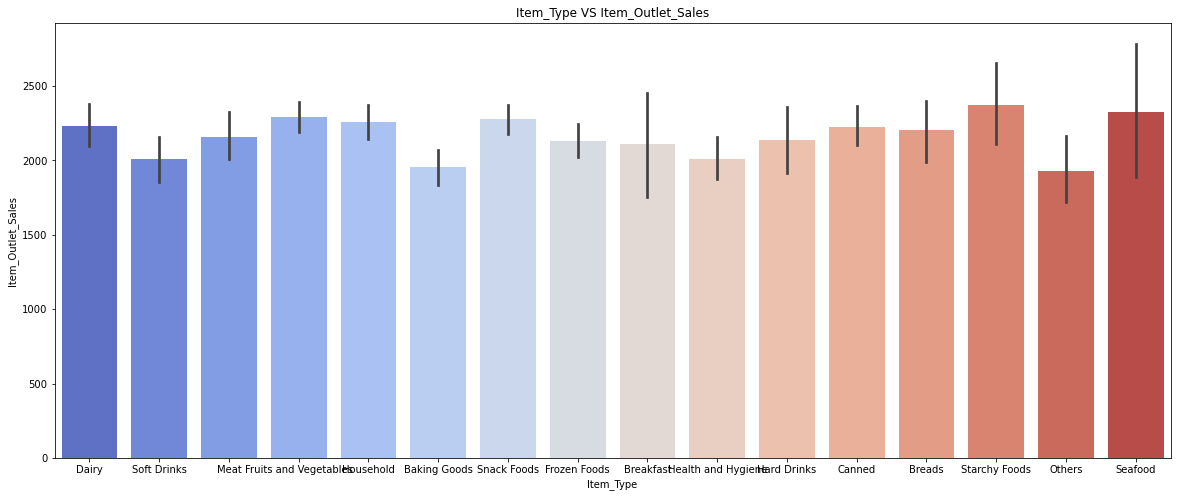

In [22]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Item_Type', data = train, palette = 'coolwarm')
plt.title("Item_Type VS Item_Outlet_Sales")
plt.show()

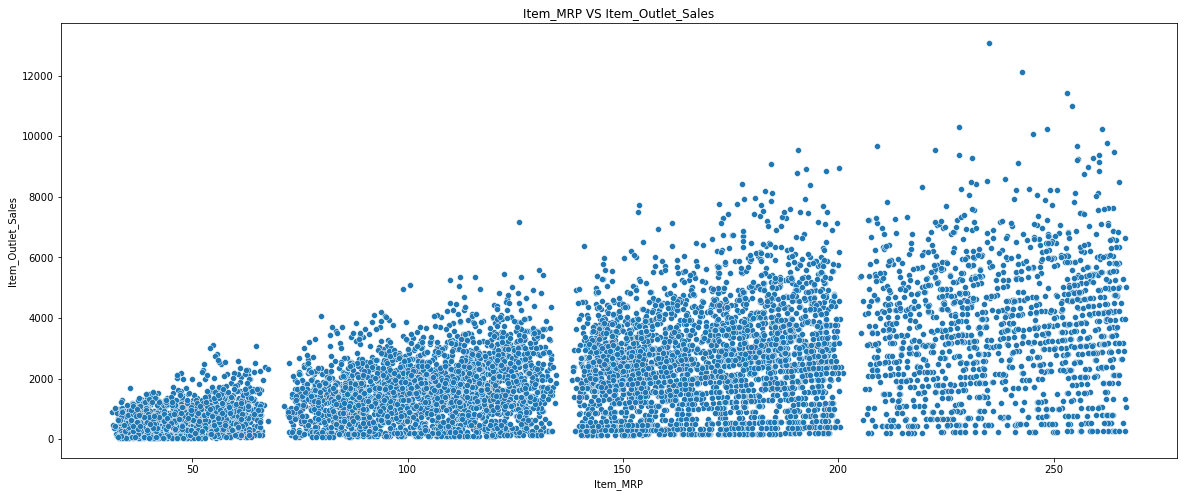

In [23]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = train)
plt.title("Item_MRP VS Item_Outlet_Sales")
plt.show()

* As seen from the correlation heat map, Item_Outlet_Sales is **increasing** with Item_MRP.

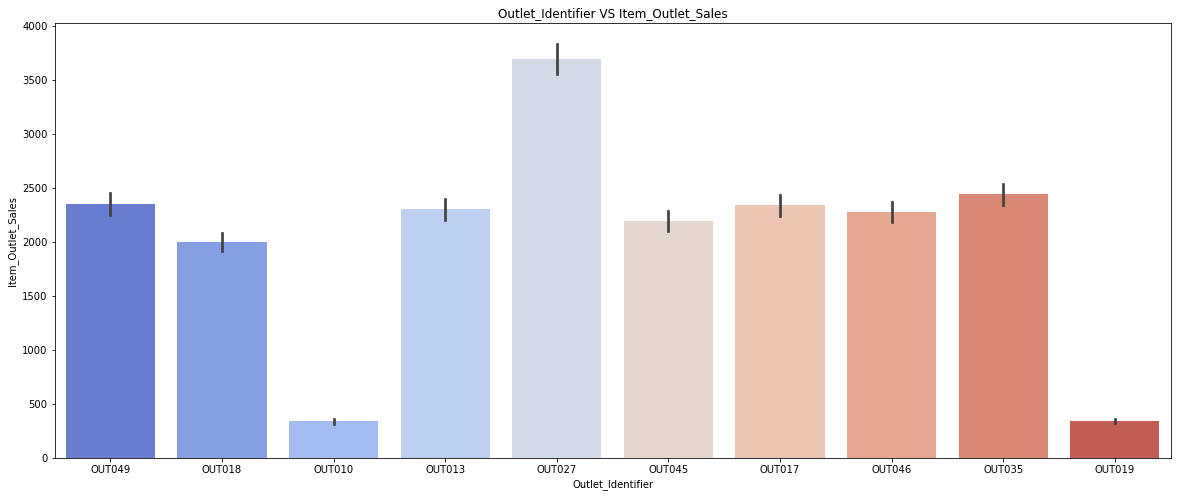

In [24]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Identifier', data = train, palette = 'coolwarm')
plt.title("Outlet_Identifier VS Item_Outlet_Sales")
plt.show()

* **OUT27** is more averaging in Item_Outlet_Sales.

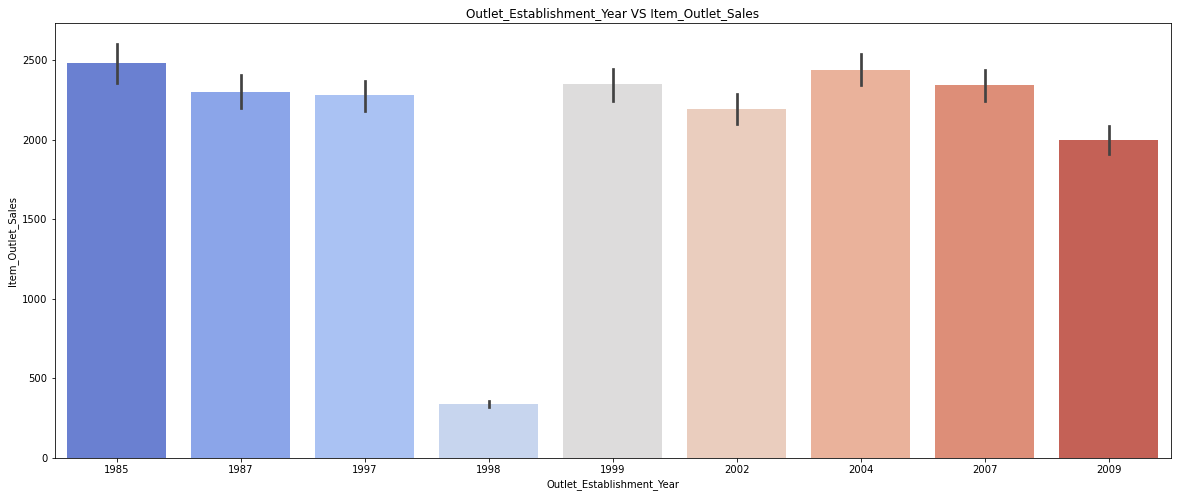

In [25]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Establishment_Year', data = train, palette = 'coolwarm')
plt.title("Outlet_Establishment_Year VS Item_Outlet_Sales")
plt.show()

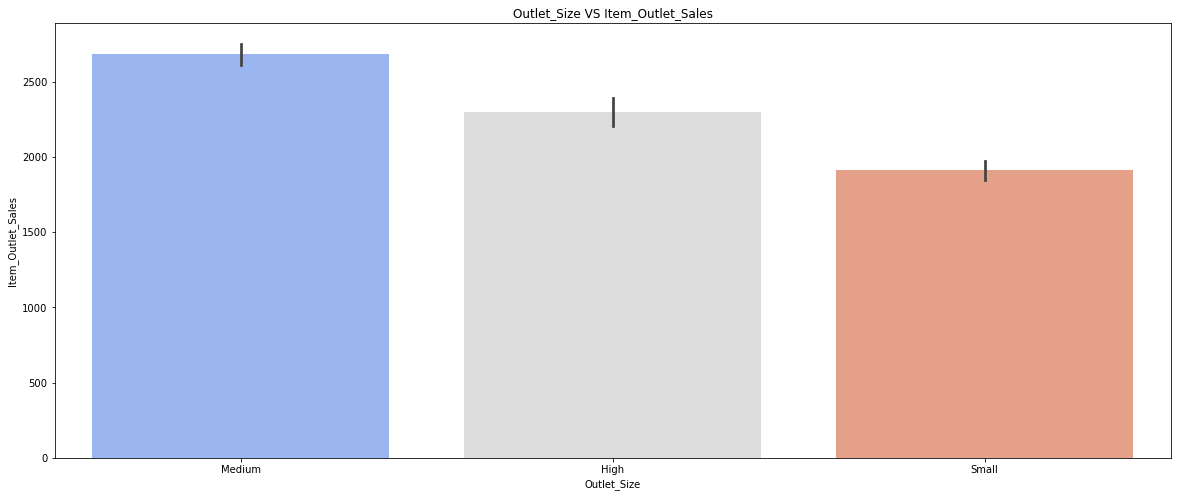

In [26]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Size', data = train, palette = 'coolwarm')
plt.title("Outlet_Size VS Item_Outlet_Sales")
plt.show()

* **Medium** Outlet_Size having high average Item_Outlet_Sales followed by High and Small.

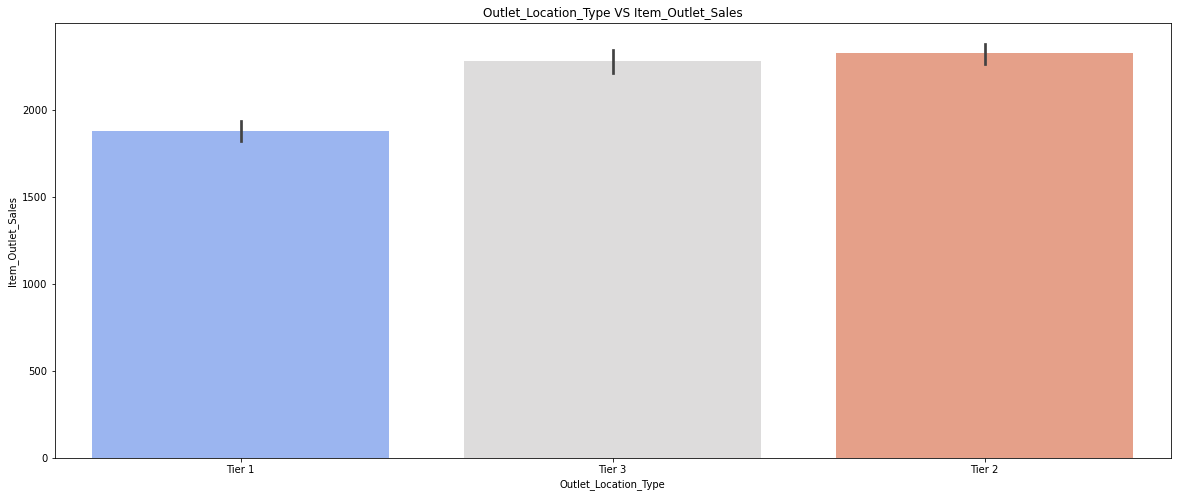

In [27]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', data = train, palette = 'coolwarm')
plt.title("Outlet_Location_Type VS Item_Outlet_Sales")
plt.show()

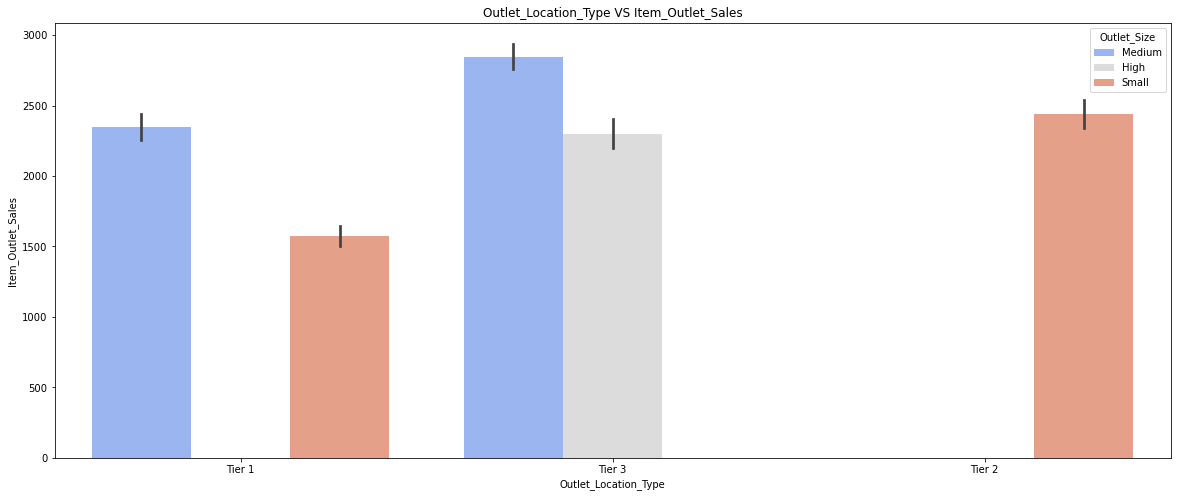

In [28]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', data = train, palette = 'coolwarm', hue = 'Outlet_Size')
plt.title("Outlet_Location_Type VS Item_Outlet_Sales")
plt.show()

* From the bar plot above, we can say that **Tier3 is a very big area** may be at borders of the city and **Tier2 is small** having only Small Outlet_Size.

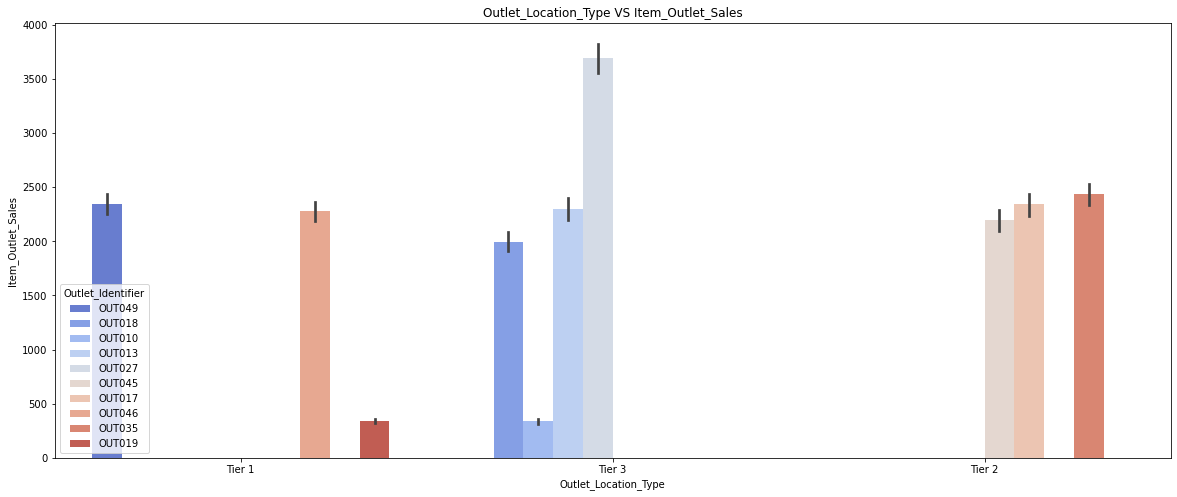

In [29]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', data = train, palette = 'coolwarm', hue = 'Outlet_Identifier')
plt.title("Outlet_Location_Type VS Item_Outlet_Sales")
plt.show()

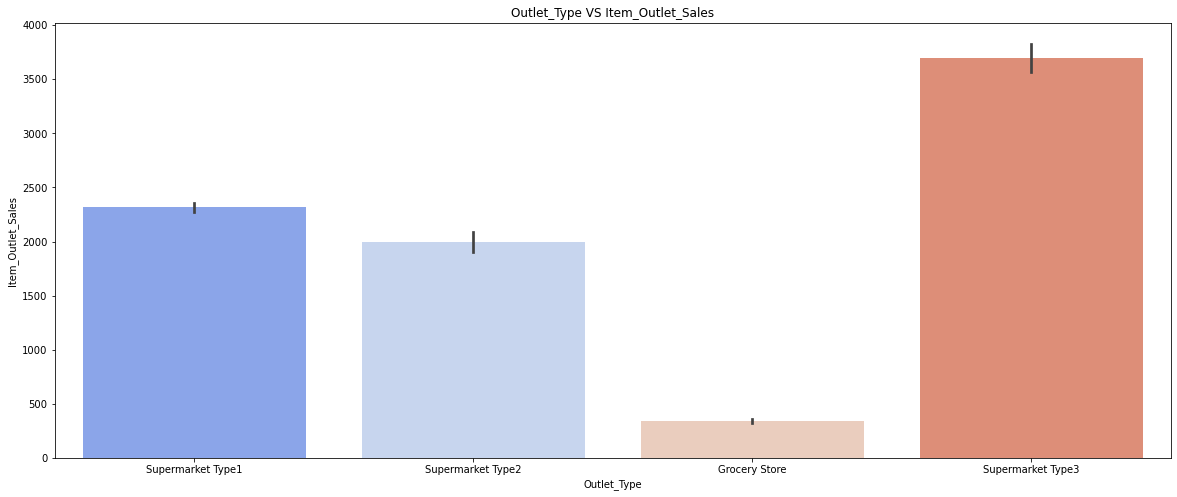

In [30]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Type', data = train, palette = 'coolwarm')
plt.title("Outlet_Type VS Item_Outlet_Sales")
plt.show()

* **Supermarket Type3** has more average Item_Oulet_Sales and **Grocery Store** has very low Item_Outlet_Sales.

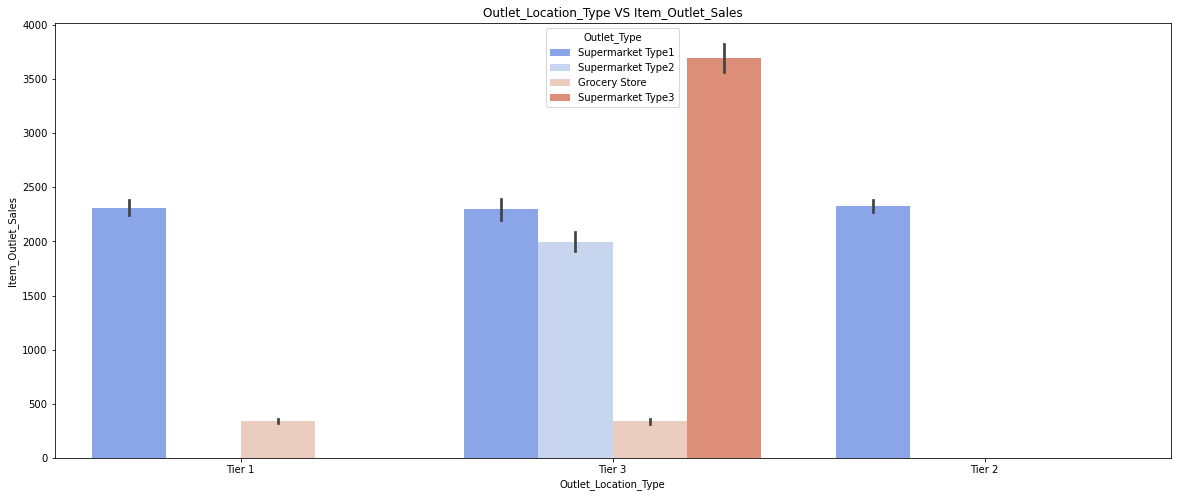

In [31]:
plt.figure(figsize = (20, 8))
sns.barplot(y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', data = train, palette = 'coolwarm', hue = 'Outlet_Type')
plt.title("Outlet_Location_Type VS Item_Outlet_Sales")
plt.show()

## **Checking For Outliers**

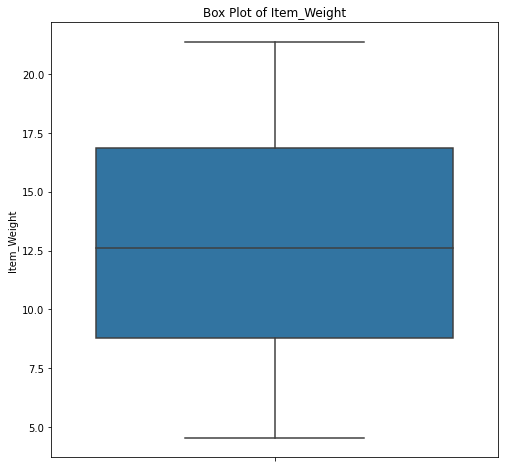

In [32]:
plt.figure(figsize = (8, 8))
sns.boxplot(y = 'Item_Weight', data = train)
plt.title("Box Plot of Item_Weight")
plt.show()

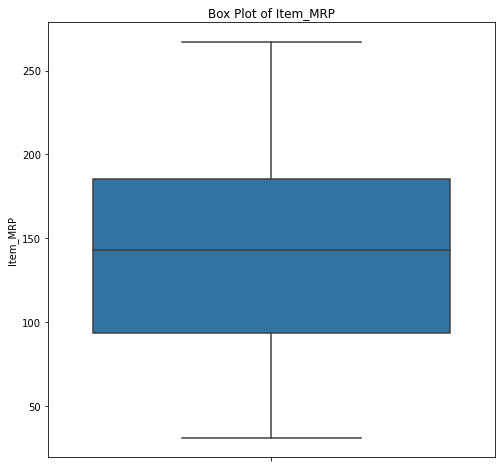

In [33]:
plt.figure(figsize = (8, 8))
sns.boxplot(y = 'Item_MRP', data = train)
plt.title("Box Plot of Item_MRP")
plt.show()

## **Data Preprocessing**

In [34]:
test = pd.read_csv('Big_Mart_Sales_Prediction_Test.csv')

train['source']='train'
test['source']='test'

# Concatinating both train and test sets for imputing missing values and feature engineering and transformation

data =  pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [35]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,NCV42,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765,NaN,NaN,NaN,12.7929,4.6525,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204,NaN,NaN,NaN,0.0659528,0.0514586,0,0.0270357,0.0540205,0.0940373,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204,NaN,NaN,NaN,141.005,62.0869,31.29,94.012,142.247,185.856,266.888
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204,NaN,NaN,NaN,1997.83,8.37166,1985,1987,1999,2004,2009
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### **Missing Values Imputation**

In [37]:
from scipy.stats import mode

item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
miss_bool = data['Item_Weight'].isnull() 
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
miss_bool = (data['Item_Visibility'] == 0)
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

## **Feature Engineering**

In [38]:
data['Item_Identifier_Type'] = data['Item_Identifier'].apply(lambda x : x[:2])
data['Item_Identifier_Type_Number'] = data['Item_Identifier'].apply(lambda x : int(x[-2:]))
data['Outlet_Identifier_Number'] = data['Outlet_Identifier'].apply(lambda x : int(x[-3:]))
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']

outlet_location_avg = data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
data['Outlet_Location_AVG'] = data['Outlet_Location_Type'].apply(lambda y : outlet_location_avg[y])

outlet_identifier_avg = data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
data['Outlet_Identifier_AVG'] = data['Outlet_Identifier'].apply(lambda y : outlet_identifier_avg[y])

item_type_avg = data.groupby('Item_Type')['Item_Outlet_Sales'].mean()
data['Item_Type_AVG'] = data['Item_Type'].apply(lambda y : item_type_avg[y])

outlet_type_avg = data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
data['Outlet_Type_AVG'] = data['Outlet_Type'].apply(lambda y : outlet_type_avg[y])

outlet_size_avg = data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
data['Outlet_Size_AVG'] = data['Outlet_Size'].apply(lambda y : outlet_size_avg[y])

identifier_type_avg = data.groupby('Item_Identifier_Type')['Item_Outlet_Sales'].mean()
data['Identifier_Type_AVG'] = data['Item_Identifier_Type'].apply(lambda y : identifier_type_avg[y])

identifier_type_number_avg = data.groupby('Item_Identifier_Type_Number')['Item_Outlet_Sales'].mean()
data['Identifier_Type_Number_AVG'] = data['Item_Identifier_Type_Number'].apply(lambda y : identifier_type_number_avg[y])

data['Total_AVG'] = (data['Outlet_Location_AVG'] + data['Outlet_Identifier_AVG'] + data['Item_Type_AVG'] + data['Outlet_Type_AVG'] + data['Outlet_Size_AVG'] + data['Identifier_Type_AVG'] + data['Identifier_Type_AVG']) / 7

### **Feature Transformation**

In [39]:
data = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Identifier_Type_Number', 'Outlet_Establishment_Year'], axis = 1)

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                             'low fat' : 'Low Fat',
                                                             'reg' : 'Regular'})
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat' : 0,
                                                         'Regular' : 1})

data['Item_Visibility'] = np.sqrt(data['Item_Visibility'])

data['Item_Type'] = data['Item_Type'].map({'Fruits and Vegetables' : 1,
                                           'Snack Foods' : 2, 
                                           'Household' : 3,
                                           'Frozen Foods' : 4,
                                           'Dairy' : 5,
                                           'Canned' : 6,
                                           'Baking Goods' : 7,
                                           'Health and Hygiene' : 8,
                                           'Soft Drinks' : 9,
                                           'Meat' : 10,
                                           'Breads' : 11,
                                           'Hard Drinks' : 12,
                                           'Others' : 13,
                                           'Starchy Foods' : 14,
                                           'Breakfast' : 15,
                                           'Seafood' : 16})

data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1' : 1,
                                                                 'Tier 2' : 2,
                                                                 'Tier 3' : 3})

data['Outlet_Type'] = data['Outlet_Type'].map({'Supermarket Type1' : 1,
                                               'Supermarket Type2' : 2,
                                               'Supermarket Type3' : 3,
                                               'Grocery Store' : 4})

data['Outlet_Size'] = data['Outlet_Size'].map({'Small' : 1,
                                               'Medium' : 2,
                                               'High' : 3})

data['Item_Identifier_Type'] = data['Item_Identifier_Type'].map({'FD' : 1,
                                                                 'DR' : 2,
                                                                 'NC' : 3})



In [40]:
# Final Dataset

data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Weight,14204,NaN,NaN,NaN,12.7934,4.65172,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,NaN,NaN,NaN,0.353351,0.478027,0,0,0,1,1
Item_Visibility,14204,NaN,NaN,NaN,0.247775,0.0912012,0.0597888,0.17648,0.239152,0.311336,0.573054
Item_Type,14204,NaN,NaN,NaN,5.45079,3.75065,1,2,5,8,16
Item_MRP,14204,NaN,NaN,NaN,141.005,62.0869,31.29,94.012,142.247,185.856,266.888
Outlet_Size,14204,NaN,NaN,NaN,1.5464,0.683045,1,1,1,2,3
Outlet_Location_Type,14204,NaN,NaN,NaN,2.11286,0.812755,1,1,2,3,3
Outlet_Type,14204,NaN,NaN,NaN,1.70959,1.09002,1,1,1,2,4
Item_Outlet_Sales,8523,NaN,NaN,NaN,2181.29,1706.5,33.29,834.247,1794.33,3101.3,13087
source,14204,2,train,8523,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
train = data[data['source'] == 'train'].drop("source", axis = 1)
test = data[data['source'] == 'test'].drop(["source" , "Item_Outlet_Sales"], axis = 1)

train.shape, test.shape

((8523, 20), (5681, 19))

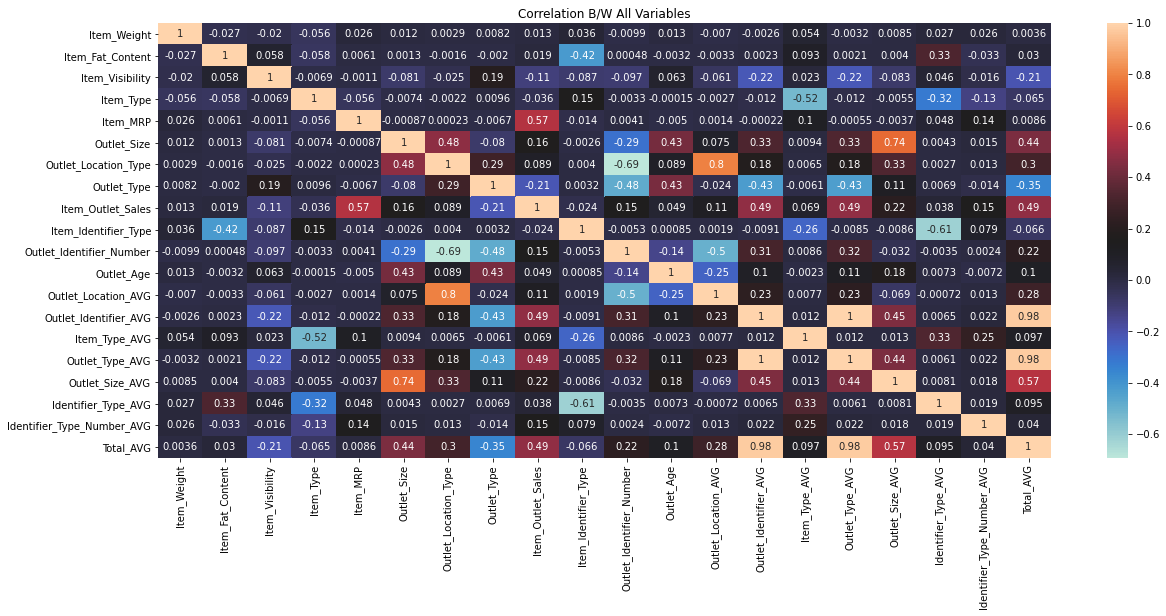

In [42]:
# Correlation B/W all variables after feature engineering

plt.figure(figsize = (20, 8))
sns.heatmap(train.corr(), annot = True, cmap="icefire")
plt.title("Correlation B/W All Variables")
plt.show()

Features like **Outlet_Identifier_AVG, Outlet_Type_AVG, Total_AVG** are highly correlated with Item_Outlet_Sales followed by **Outlet_Size_AVG, Outlet_Identifier_Number, Identifier_Type_Number_AVG, Outlet_Location_AVG.**

### **Train-Test Split**

In [43]:
x = train.drop('Item_Outlet_Sales', axis = 1).values
y = np.array(train['Item_Outlet_Sales'].values).reshape(len(train), -1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 17)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7670, 19), (853, 19), (7670, 1), (853, 1))

# **Models**

In [44]:
# Simpel Linear Regression

lr = models.linear_regression(x_train, y_train)
pred_lr = lr.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_lr, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_lr, y_test))}")

Training Completed .....

Mean Absolute Error :- 801.1099791091576
Root Mean Squared Error :- 1070.8351108100958


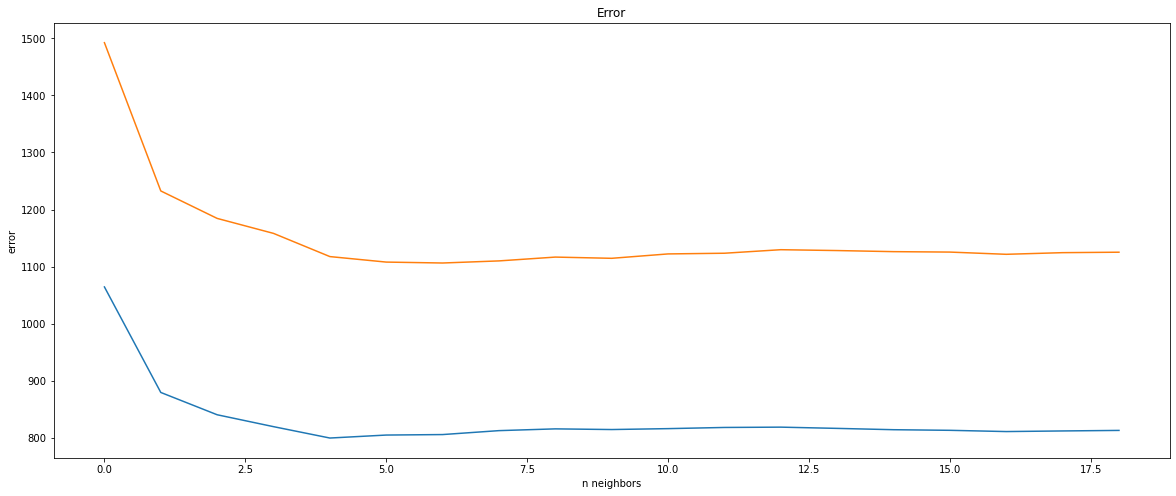

In [45]:
# KNearestNeighbors Regressor

abs_error = []
rms_error = []
k = []

for i in range(1, 20):
    knn = models.knn_regressor(x_train, y_train, n_neighbors = i)
    pred_knn = knn.predict(x_test)
    abs_error.append(mean_absolute_error(pred_knn, y_test))
    rms_error.append(np.sqrt(mean_squared_error(pred_knn, y_test)))
    k.append(i)

plt.figure(figsize = (20, 8))
plt.plot(abs_error)
plt.plot(rms_error)
plt.title('Error')
plt.xlabel('n neighbors')
plt.ylabel('error')
plt.show()

In [46]:
opt = rms_error.index(min(rms_error))

print(f"Minimum Mean Absolute Error :- {abs_error[opt]}")
print(f"Minimum Root Mean Squared Error :- {rms_error[opt]}")
print(f"Optimum KNearestNeighbors Value :- {k[opt]}")

Minimum Mean Absolute Error :- 805.7638493384692
Minimum Root Mean Squared Error :- 1106.3567867812706
Optimum KNearestNeighbors Value :- 7


In [47]:
# DecisionTree Regressor

abs_error = []
rms_error = []
depth = []
features = []
nodes = []

for i in range(3, 11):
    for j in range(4, 20):
        for k in range(6, 40):
            dtree = models.d_tree(x_train, y_train, max_depth = i, max_features = j, max_leaf_nodes = k)
            pred_dtree = dtree.predict(x_test)
            rms_error.append(np.sqrt(mean_squared_error(pred_dtree, y_test)))
            abs_error.append(mean_absolute_error(pred_dtree, y_test))
            depth.append(i)
            features.append(j)
            nodes.append(k)

In [48]:
opt = rms_error.index(min(rms_error))
opt_depth = depth[opt]
opt_features = features[opt]
opt_nodes = nodes[opt]
print(f"Minimum Mean Absolute Error :- {abs_error[opt]}")
print(f"Minimum Root Mean Squared Error :- {rms_error[opt]}")
print(f"Optimum Depth :- {opt_depth}")
print(f"Optimum Features :- {opt_features}")
print(f"Optimum Nodes :- {opt_nodes}")

Minimum Mean Absolute Error :- 736.8980385680336
Minimum Root Mean Squared Error :- 1030.2824966892704
Optimum Depth :- 7
Optimum Features :- 10
Optimum Nodes :- 25


In [49]:
dtree = models.d_tree(x_train, y_train, max_depth = opt_depth, max_features = opt_features, max_leaf_nodes = opt_nodes)
pred_dtree = dtree.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_dtree, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_dtree, y_test))}")

Training Completed .....

Mean Absolute Error :- 736.8980385680336
Root Mean Squared Error :- 1030.2824966892704


In [50]:
# RandomForest Regressor

rf = models.random_forest(x_train, y_train, max_depth = opt_depth, max_features = opt_features, max_leaf_nodes = opt_nodes)
pred_rf = rf.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_rf, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_rf, y_test))}")

Training Completed .....

Mean Absolute Error :- 733.0912151144826
Root Mean Squared Error :- 1028.282109126002


In [51]:
# XGBoost Regressor

xgb = models.xgboost(x_train, y_train, max_depth = 4, learning_rate = 0.01, n_estimators = 500, colsample_bytree = 0.9, colsample_bylevel = 0.9, 
                     colsample_bynode = 0.9)
pred_xgb = xgb.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_xgb, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_xgb, y_test))}")

Training Completed .....

Mean Absolute Error :- 721.7863355084721
Root Mean Squared Error :- 1019.6240214974315


In [52]:
# CatBoost Regressor

cat = models.catboost(x_train, y_train, max_depth = opt_depth, learning_rate = 0.01, n_estimators = 500, colsample_bylevel = 0.9)
pred_cat = cat.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_cat, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_cat, y_test))}")

Training Completed .....

Mean Absolute Error :- 722.1235082015306
Root Mean Squared Error :- 1020.2179962217231


In [53]:
# LightGBM Regressor

lgbm = models.lightgbm(x_train, y_train, max_depth = 4, learning_rate = 0.01, n_estimators = 600, colsample_bytree = 0.8)
pred_lgbm = lgbm.predict(x_test)

print("Training Completed .....\n")
print(f"Mean Absolute Error :- {mean_absolute_error(pred_lgbm, y_test)}")
print(f"Root Mean Squared Error :- {np.sqrt(mean_squared_error(pred_lgbm, y_test))}")

Training Completed .....

Mean Absolute Error :- 721.966957842006
Root Mean Squared Error :- 1017.0207772403032


**XGBoost, CatBoost and LightGBM Models are performing better than other models.**

# **Final Models**

In [54]:
xgb = models.xgboost(x, y, max_depth = 4, learning_rate = 0.01, n_estimators = 500)
cat = models.catboost(x, y, max_depth = opt_depth, learning_rate = 0.01, n_estimators = 500)
lgbm = models.lightgbm(x, y, max_depth = 4, learning_rate = 0.01, n_estimators = 600, colsample_bytree = 0.8)
print("Training Completed .....")

Training Completed .....


In [55]:
pred_xgb = xgb.predict(test.values)
pred_cat = cat.predict(test.values)
pred_lgbm = np.abs(lgbm.predict(test.values))

In [56]:
test = pd.read_csv("Big_Mart_Sales_Prediction_Test.csv")

final_pred_xgb = pd.DataFrame()
final_pred_xgb['Item_Identifier'] = test['Item_Identifier'].values
final_pred_xgb['Outlet_Identifier'] = test['Outlet_Identifier'].values
final_pred_xgb['Item_Outlet_Sales'] = pred_xgb

final_pred_cat = pd.DataFrame()
final_pred_cat['Item_Identifier'] = test['Item_Identifier'].values
final_pred_cat['Outlet_Identifier'] = test['Outlet_Identifier'].values
final_pred_cat['Item_Outlet_Sales'] = pred_cat

final_pred_lgbm = pd.DataFrame()
final_pred_lgbm['Item_Identifier'] = test['Item_Identifier'].values
final_pred_lgbm['Outlet_Identifier'] = test['Outlet_Identifier'].values
final_pred_lgbm['Item_Outlet_Sales'] = pred_lgbm

final_pred_xgb.to_csv("Final_XGBoost_Predictions.csv", index = False)
final_pred_cat.to_csv("Final_CatBoost_Predictions.csv", index = False)
final_pred_lgbm.to_csv("Final_LightGBM_Predictions.csv", index = False)

print("Exported Successfully !!!")

Exported Successfully !!!


# ***Thank You***